<a href="https://colab.research.google.com/github/bereacs/l01-greedy-tsp-jessicadouthit/blob/master/L01_Greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [L01: Implementing Greedy TSP](https://docs.google.com/document/d/1JA_CWBXPN6whvJAemnJLvtYJ3Pbk84dTUolWO_QqosA/edit?usp=sharing)
Written by Dr. Jan Pearce, Berea College

Complete the code by meeting all linked requirements and fixing all FIXMEs

## Your Name: FIXME

**SUMMARY**: A brief summary description of the design and implementation, including how much your initial design plan evolved, the final result you achieved and the amount of time you spent as a programmer or programmers in accomplishing these results. This should be no more than two paragraphs.

FIXME

**PERSONNEL**: A description of who you worked with and on what sections.  It is expected that all collaboration is done as pair programming together. Also, note these collaborations in the code section itself.

FIXME

**CHALLENGES**: Descriptions of the largest challenges you overcame and what made them challenging.

FIXME

**INNOVATIONS**: Any innovations that were not specifically required by the assignment. These are not required, but should be highlighted if included.

FIXME

**TESTING**: Describe how you tested this work.

FIXME

**ERRORS**: A list in bulleted form of all known errors and deficiencies.

FIXME

**COMMENTS**: A paragraph or so of your own comments on and reactions to the Lab.

FIXME

## Import Libraries

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from urllib.request import urlopen

### Read data

In [ ]:
tspdata = urlopen("http://cs.berea.edu/courses/csc445/data/tsp-small.txt").read().decode('ASCII')
print(tspdata)

6
1 5 
3 7 
5 11 
3 5 
5 7 
7 9 



## TSP Class

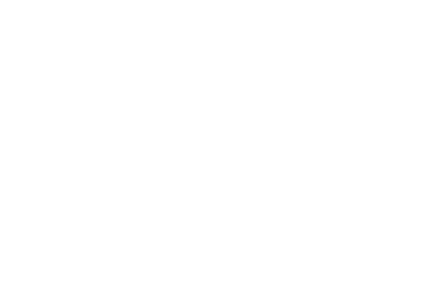

In [ ]:
"""
Greedy TSP implementation using NetworkX.
Reads coordinates from a .txt file, builds a graph, applies the greedy heuristic,
and outputs both a visualization and the solution path in required format.

Author: Jessica Douthit
Course: CSC445
Assignment: L01 Implementing Greedy TSP
"""

import networkx as nx
import matplotlib.pyplot as plt
import math


class TSP:

    def __init__(self):
        """ TSP class containing data needed for networkx graph creation, file reading and file writing.
            Creates a graph for the traveling salesperson problem using the greedy algorithm
        """
        self.dimension = None
        self.nodeData = []
        self.graph = nx.DiGraph()
        self.coords = {}
        self.places = []
        self.route = []

    def extractData(self, inputFile=""):
        """
        Iterates through the input file and appends each coordinate into the node list.

        """
        with open(inputFile, 'r') as f:
            lines = f.readlines()
        self.dimension = int(lines[0].strip())
        self.nodeData = []
        for i, line in enumerate(lines[1:], start=1):
            x, y = map(int, line.split())
            self.nodeData.append((i, (x, y)))  # store node number + coordinate

    def setUpCoords(self):
        """ Puts the coordinates for each node into a dictionary as a tuple with the node as the key """
        for node, coord in self.nodeData:
            self.coords[node] = coord

    def calculateDistance(self, a, b):
        """calculates & returns the distance between points a and b
        Arguments:
            a {[tuple]} -- tuple of numbers for the x and y coordinate of a node
            b {[tuple]} -- tuple of numbers for the x and y coordinate of a node
        Returns:
            [float] -- the distance between the two points using the distance formula
        """
        return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

    def getRoute(self, current, visits=None, nVisits=None, needList=True):
        """Makes a list of the nodes to be visited, in order, according to the greedy algorithm for the TSP
        Arguments:
            current {int} -- the node to start at, not a list index
        Keyword Arguments:
            visits {list} -- list of places already visited (default: {[]})
            nVisits {list} -- list of places not visited (default: {[]})
            needList {bool} -- boolean deciding if the list of places not visited needs to be filled (default: {True})
        """
        if visits is None: visits = []
        if nVisits is None: nVisits = []

        if needList:
            visits = [current]
            nVisits = self.listPlaces()
            nVisits.remove(current)

        # while there are still unvisited nodes
        while nVisits:
            nearest = min(
                nVisits,
                key=lambda city: self.calculateDistance(self.coords[current], self.coords[city])
            )
            visits.append(nearest)
            nVisits.remove(nearest)
            current = nearest

        return visits

    def beGreedy(self, start=None):
        """ Puts together the greedy algorithm.
        If a start node is provided, uses only that start.
        If no start node is provided, tries all nodes and picks the best tour.
        Arguments:
            start {int} -- the starting node for the greedy algorithm (default: None)
        """
        if start is not None:
            # Run greedy just from the given start
            self.route = self.getRoute(start)
            self.route.append(start)
            return self.route

        # Otherwise, try all start nodes and keep the best
        best_route = None
        best_cost = float("inf")

        for s in self.listPlaces():
            route = self.getRoute(s)
            route.append(s)
            cost = 0
            for i in range(len(route) - 1):
                cost += self.calculateDistance(self.coords[route[i]], self.coords[route[i+1]])

            if cost < best_cost:
                best_cost = cost
                best_route = route

        self.route = best_route
        return self.route

    def listPlaces(self):
        """makes a list of all the nodes/places from the dictionary
        Returns:
            [list] -- list of all the nodes/places
        """
        return list(self.coords.keys())

    def cleanUpList(self, visited, notVisited):
        """removes items in visited from notVisited
        Arguments:
            visited {list}
            notVisited {list}
        Returns:
            [list] -- a list of notVisited - visited
        """
        for item in visited:
            if item in notVisited:
                notVisited.remove(item)
        return notVisited

    def addNodes(self):
        """ adds nodes to the networkx graph """
        for everything in self.nodeData:
            node = everything[0]
            self.graph.add_node(node, pos=self.coords[node])

    def addEdges(self):
        """Adds edges to the networkx graph"""
        x = 0
        while x < len(self.route)-1:
            self.graph.add_edge(
                self.route[x],
                self.route[x+1],
                weight=self.calculateDistance(
                    self.coords[self.route[x]],
                    self.coords[self.route[x+1]]
                )
            )
            x += 1

    def showGraph(self):
        """Uses the imported libraries to display the graph"""
        coords = nx.get_node_attributes(self.graph, 'pos')
        labels = nx.get_edge_attributes(self.graph, 'weight')
        nx.draw(self.graph, coords, with_labels=True, node_color="lightblue")
        nx.draw_networkx_edge_labels(
            self.graph,
            coords,
            edge_labels={e: f"{w:.1f}" for e, w in labels.items()}
        )
        plt.show()

    def formatOutput(self):
        """Return a triple-quoted string of the tour in input format (but in tour order)."""
        output = f"{len(self.route) - 1}\n"  # exclude repeated last node
        for node in self.route[:-1]:
            x, y = self.coords[node]
            output += f"{x} {y}\n"
        return f'"""\n{output.strip()}\n"""'


def main():
    tsp = TSP()

    # Choose which file to run
    tsp.extractData("tsp-small.txt")
    # tsp.extractData("tsp-48.txt")

    tsp.setUpCoords()
    tsp.addNodes()
    tsp.beGreedy()       # will run best greedy across all start nodes
    tsp.addEdges()
    tsp.showGraph()

    print(tsp.formatOutput())


if __name__ == "__main__":
    main()
